In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
def distancia_euclidiana(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [59]:
def knn(train_data, test_instance, k):
    distances = []
    for i in range(len(train_data)):
        dist = distancia_euclidiana(test_instance, train_data[i])
        distances.append((train_data[i], dist, i))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [60]:
def avalia_classe(neighbors, num_classes):
    class_votes = [0] * num_classes
    for neighbor in neighbors:
        if len(neighbor) > 0 and isinstance(neighbor[0][-1], int):
            class_idx = int(neighbor[0][-1])
            if 0 <= class_idx < num_classes:
                class_votes[class_idx] += 1

    return np.argmax(class_votes)

In [61]:
# Carregar o dataset
url = "./winequality-red.csv"
df = pd.read_csv(url)
X = df.iloc[:, 0:11].values
y = df['quality'].values.astype(int)

In [62]:
k = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
predictions = []
for i in range(len(X_test)):
    neighbors = knn(X_train, X_test[i], k)
    result = avalia_classe(neighbors, len(np.unique(y)))
    predictions.append(result)


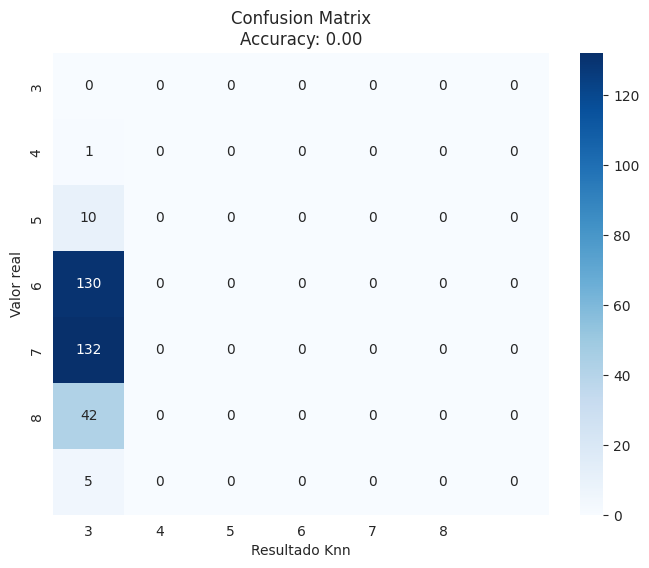

In [64]:
conf_matrix = confusion_matrix(y_test, predictions)

# Calcular a acurácia
accuracy = accuracy_score(y_test, predictions)

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Resultado Knn')
plt.ylabel('Valor real')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()